# Image Recognition Serangga Dengan Convolutional Neural Network


### Anggota Kelompok

##### Kelas A2 2020 Kelompok 6

| Nama | NIM | Tugas |
|------|-----|-------|
| Muhammad Daffa Putra Mahardika |	2009106036 | Data Analysis and Visualization + Evaluasi |
| Wahyu Harry Saputra Sembiring 	| 2009106049 | Data Collecting and Preprocessing + Evaluasi |
| Risky Kurniawan | 2009106050 | Data Collecting and Preprocessing + Data Modeling |


### Table of Content
- Anggota Kelompok Kelompok 
- Table of Content
- Deskripsi dan Tujuan Project 
- Import Library 
- Data Collecting and Preprocessing 
  - Deskripsi Dataset
  - Data Train & Validation Splitting
  - Data Preprocessing
- Data Analysis and Visualization 
  - Preview Datasets
  - Metadata
  - Class Distribution
- Data Modelling 
  - Adding Layers
  - Custom Callbacks
  - Fit Model
  - Model Save
- Evaluasi 
  - Model Load
  

### Deskripsi dan Tujuan Project 

Proyek ini bertujuan untuk membuat sebuah model yang dapat mengenali jenis dari serangga dengan menggunakan algoritma CNN (Convolutional neural network).
Dataset berupa data images yang diambil dari Kaggle: Insects Recognition yang mana terdiri dari images dari 5 jenis serangga. yaitu:

  - Kupu - Kupu, 
  - Capung, 
  - Nyamuk, 
  - Belalang,
  - dan Kumbang.


Batasan:
  - Model ini hanya dapat mengenali:
    - Kupu - Kupu, 
    - Capung, 
    - Nyamuk, 
    - Belalang,
    - dan Kumbang.

Dataset diambil dari website kaggle. https://www.kaggle.com/search?q=insect+dataset



### Import Library

In [1]:
# add this if using colab 
# !pip install split-folders


import os
import numpy as np
import pandas as pd

# plot
import glob
# import cv2
import matplotlib.pyplot as plt

# tf
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import splitfolders

import pathlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Data Collecting and Preprocessing

#### Deskripsi Dataset

Dataset ini berupa gambar dari 5 serangga berbeda.

##### Jumlah Dataset

- Kupu - Kupu: 899
- Capung: 1036
- Nyamuk: 690
- Belalang: 960
- Kumbang: 864

Total: 4449 data

#### Data Train & Validation Splitting

<!-- if URL path ke direktori dataset. -->
berupa direktori dataset.
dan dataset output (dataset yang akan dihasilkan ketika melakukan split folder). 

In [2]:
# uncomment if using google colab
# from google.colab import drive
# drive.mount('/content/drive')
# url = '/content/drive/MyDrive/Dataset'
     

# uncomment if using local env
url = 'insect'


url_split = 'dataset_output'

Mounted at /content/drive


In [3]:
splitfolders.ratio(url, output=url_split, seed=42, ratio=(0.7,0.2,0.1), group_prefix=None)

Copying files: 4449 files [01:25, 52.25 files/s] 


Disini saya menggunakan Image data generator dan batch size sebanyak 128
untuk validation, saya menggunakan 20% data.
Kemudian untuk subset training dan validation, target size nya adalah 120.

In [6]:
# Ambil path dari folder masing - masing output
train = 'dataset_output/train'
val = 'dataset_output/val'
test = 'dataset_output/test'

#### Data Preprocessing 

In [5]:
batch_size = 128

train_image_generator = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45,
    width_shift_range= 0.2,
    height_shift_range=0.2,
    zoom_range= 0.2,
    horizontal_flip=True,
    validation_split= 0.1,
    fill_mode='nearest',
) # data preprocessing

train = train_image_generator.flow_from_directory(
    train, 
    target_size=(120,120),
    batch_size=batch_size, 
    # color_mode="grayscale"
)

test = train_image_generator.flow_from_directory(
    test, 
    target_size=(120,120),
    batch_size=batch_size,
    # color_mode="grayscale"
)

val = train_image_generator.flow_from_directory(
    val, 
    target_size=(120,120),
    batch_size=batch_size,
    # color_mode="grayscale"
)

Found 3112 images belonging to 5 classes.
Found 449 images belonging to 5 classes.
Found 888 images belonging to 5 classes.


### Data Analysis and Visualization

Di bawah ini, kami menampilkan 5 jenis serangga yang kami visualisasi

In [6]:
class_names = os.listdir('dataset_output/train/')
class_names

['Ladybird', 'Butterfly', 'Dragonfly', 'Mosquito', 'Grasshopper']

#### Preview Dataset

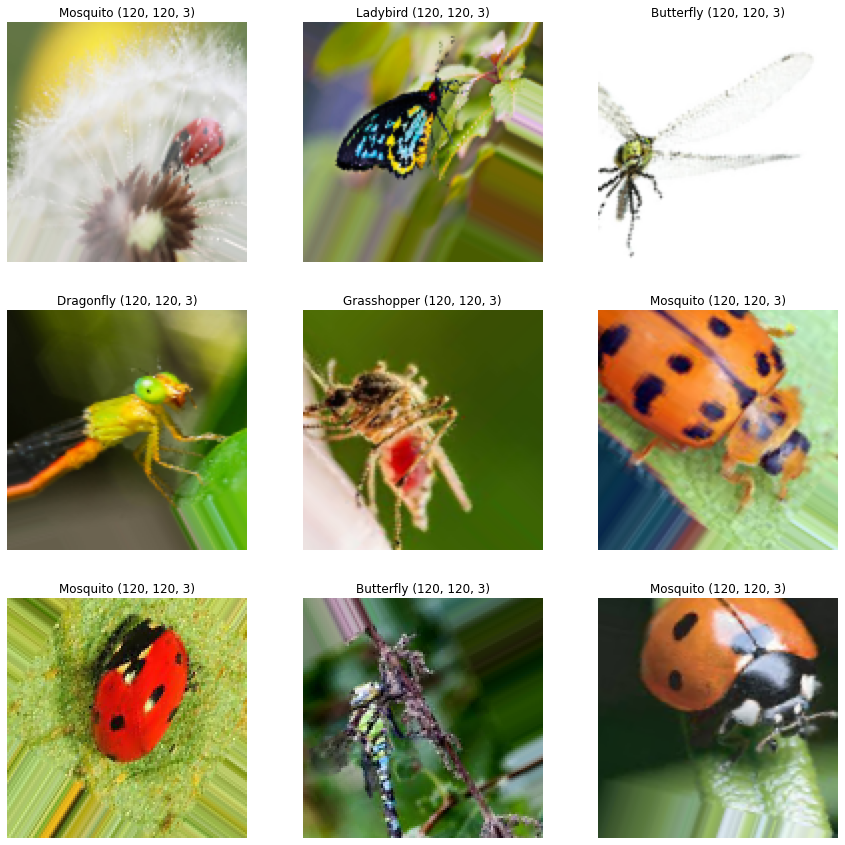

In [7]:
img,label = train.next() 
# Buat folder dlu disesuaikan sama nama di save_to_dir
plt.figure(figsize=(15,15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[i], cmap='gray')
    plt.title(f'{class_names[tf.argmax(label[i])]} {img[i].shape}')
    plt.axis('off')

#### Metadata

In [8]:
# folder
path = url

# lokasi train
path_train = 'dataset_output/train'

# lokasi test
path_test = 'dataset_output/test'

# lokasi validation
path_val = 'dataset_output/val'

def getSize():
    count = 0
    data_dir = pathlib.Path(path)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count


def getSizeTrain():
    count = 0
    data_dir = pathlib.Path(path_train)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count

def getSizeTest():
    count = 0
    data_dir = pathlib.Path(path_test)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count

def getSizeVal():
    count = 0
    data_dir = pathlib.Path(path_val)
    count += len(list(data_dir.glob('*/*.jpg')))
    return count



In [9]:
print("Nama Dataset      : Insect")
print("URL               : https://www.kaggle.com/search?q=insect+dataset" )
print("Image shape       :", img[0].shape)
print("Jumlah Data       :", getSize())
print("Jumlah Data Train :", getSizeTrain())
print("Jumlah Data Test  :", getSizeTest())
print("Jumlah Data val   :", getSizeVal())
print("Seluruh class     :", class_names)

Nama Dataset      : Insect
URL               : https://www.kaggle.com/search?q=insect+dataset
Image shape       : (120, 120, 3)
Jumlah Data       : 4449
Jumlah Data Train : 3112
Jumlah Data Test  : 449
Jumlah Data val   : 888
Seluruh class     : ['Ladybird', 'Butterfly', 'Dragonfly', 'Mosquito', 'Grasshopper']


#### Class Distribution

In [10]:
class_size = []

for i in os.listdir(path_train):
    image_count = 0
    data_dir = pathlib.Path(path_train + '/' +i)
    image_count = len(os.listdir(data_dir))
    class_size.append(image_count)

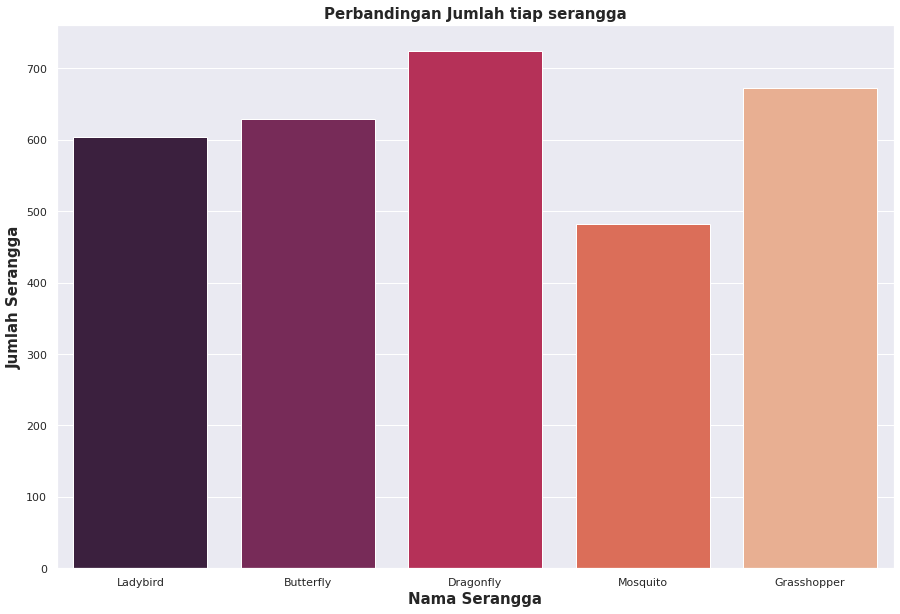

In [11]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(15,10))

sns.barplot(x=class_names,y=class_size,palette='rocket')
plt.title("Perbandingan Jumlah tiap serangga",fontfamily='arial',fontsize=15, fontweight='bold')
plt.xlabel('Nama Serangga',fontfamily='arial',fontsize=15, fontweight='bold')
plt.ylabel('Jumlah Serangga',fontfamily='arial',fontsize=15, fontweight='bold')
plt.show()

Dari visualisasi data di atas dapat terlihat bahwa jenis serangga capung (Dragonfly) memiliki jumlah yang mendominasi dari semua jenis serangga, lalu jenis serangga nyamuk (Mosquito) memiliki jumlah paling sedikit dari semua jenis serangga.

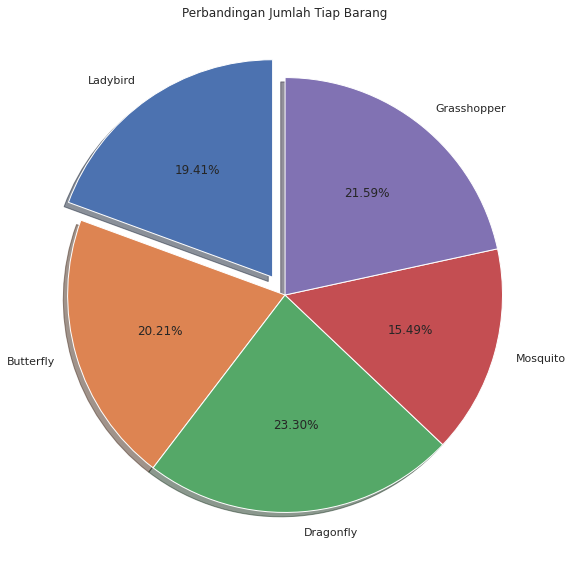

In [12]:
plt.figure(figsize=(10,10))
plt.pie(class_size, labels=class_names,startangle=90,autopct='%.2f%%',shadow=True,explode=(0.10,0,0,0,0))
plt.title('Perbandingan Jumlah Tiap Barang')
plt.show()

### Data Modelling

Pada syntax di atas model dibentuk dengan suatu layer convo 2 dimensi dari size 120 x 120 pixels dimana fungsi aktivasinya adalah relu. Terdapat tiga pembuatan layer convo, sehingga dilanjutkan dengan pembuatan layer max pooling. Kemudian dilanjutkan dengan layer flatten dan layer dense sampai dengan proses kompilasi.


#### Adding Layers

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2), # reduksi ukuran dengan max pooling
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(), # untuk menjadikan array multi dimensi menjadi satu dimensi

    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.2), # melakukan drop out terhadap neuronnya secara random

    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.2), 
    
    tf.keras.layers.Dense(5, activation='softmax'), # multiclass pakai softmax
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# adam untuk mengurangi overfitting


In [38]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 26, 26, 256)       147712    
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 256)     

#### Custom Callbacks

In [39]:
# monitor_loss_callbacks = tf.keras.callbacks.EarlyStopping(patience=10)

# sebuah custom callbacks yang gunanya untuk memberhentikan fit model ketika 
# val_acc sudah lebih dari yang diinginkan 
class StopTrain(tf.keras.callbacks.Callback):
    def __init__(self, val):
        self.val = val

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_accuracy"]
        if (accuracy >= self.val) :
            self.model.stop_training = True


my_callbacks = [
    StopTrain(0.75),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'), # untuk menyimpan logs dari history pelatihan modelnya
]


#### Fit Model

In [40]:
# coba pakai callback custom misalnya: stop kalau accuracy train > 95%, dan earlystopping
history = model.fit(train, validation_data=val, epochs=200, callbacks=my_callbacks)

Epoch 1/200
25/25 [==============================] - 23s 887ms/step - loss: 1.6066 - accuracy: 0.2407 - val_loss: 1.5407 - val_accuracy: 0.3502
Epoch 2/200
25/25 [==============================] - 23s 934ms/step - loss: 1.4904 - accuracy: 0.3531 - val_loss: 1.4180 - val_accuracy: 0.3806
Epoch 3/200
25/25 [==============================] - 22s 898ms/step - loss: 1.3874 - accuracy: 0.3956 - val_loss: 1.3175 - val_accuracy: 0.4437
Epoch 4/200
25/25 [==============================] - 27s 1s/step - loss: 1.3262 - accuracy: 0.4367 - val_loss: 1.3196 - val_accuracy: 0.4572
Epoch 5/200
25/25 [==============================] - 28s 1s/step - loss: 1.2851 - accuracy: 0.4624 - val_loss: 1.2445 - val_accuracy: 0.4651
Epoch 6/200
25/25 [==============================] - 28s 1s/step - loss: 1.2287 - accuracy: 0.4958 - val_loss: 1.1715 - val_accuracy: 0.5439
Epoch 7/200
25/25 [==============================] - 22s 868ms/step - loss: 1.2348 - accuracy: 0.4978 - val_loss: 1.2300 - val_accuracy: 0.4932
E

#### Model Save

In [46]:
model.save('./model/model_finished.h5')

### Model Evaluation

#### Model Load

#### Loss Evaluation

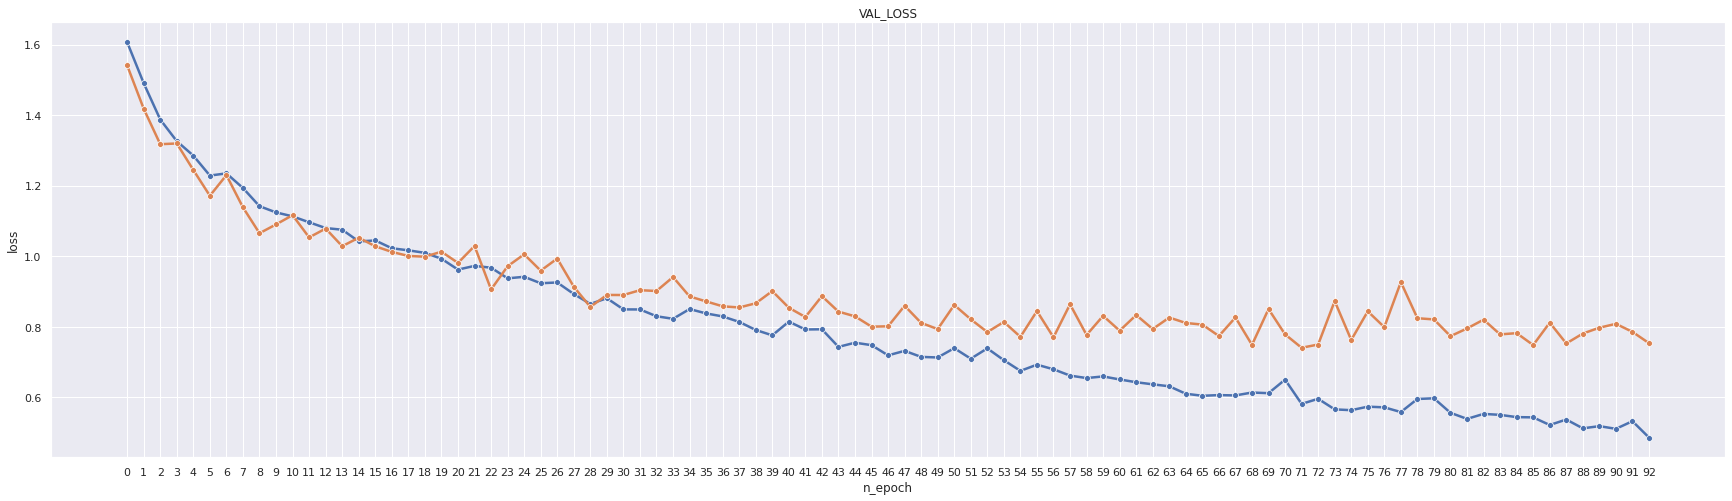

In [42]:
loss_per_epoch = history.history["loss"]
val_loss_per_epoch = history.history["val_loss"]
n_epoch = list(range(len(loss_per_epoch)))

plt.figure(figsize=(30, 8))
sns.lineplot(data=loss_per_epoch, linewidth=2.5, marker="o", linestyle='solid').set(xlabel='n_epoch', ylabel='loss', title='LOSS', xticks=n_epoch)
sns.lineplot(data=val_loss_per_epoch, linewidth=2.5, marker="o", linestyle='solid').set(xlabel='n_epoch', ylabel='loss', title='VAL_LOSS', xticks=n_epoch)
plt.show()

Model berhenti berlatih pada epoch ke 92 karena pada epoch ke 92 val_accuracy sudah mencapai 75. 
Karena di custom callbacks diatur untuk stop di val_accuracy 75.

#### Accuracy evaluation

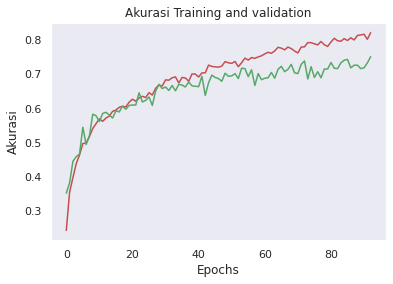

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training')
plt.plot(epochs, val_acc, 'g', label='Akurasi Validation')

plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.title('Akurasi Training and validation')
plt.grid(axis='both')

plt.show() 

Dari visualisasi di atas, terlihat bahwa akurasi dari training lebih tinggi daripada validation

#### Evaluating Model with Test Data

Untuk hasil evaluasi terhadap data testing, "akurasi" mencapai 82% dan val_akurasi mencapai 74.6%

In [ ]:
model.evaluate(test)

4/4 [==============================] - 3s 641ms/step - loss: 0.8241 - accuracy: 0.7461


[0.824120044708252, 0.7461024522781372]